# iSEPTA Philly Project
## "The Tappiest Time of the Year" Contest

### by John A. Fonte

__Goal:__ Guess the total number of SEPTA key taps done on Friday, December 20, 2019 _without going over._

- __Definition:__ A SEPTA "key tap" is a payment for public transportation fare by way of "tapping" the recently introduced magnetic cards onto digital turnstiles. <br><br>
  - For purposes of this project, a "key tap" shall refer to a single use of a SEPTA key card for payment of fare.

__Link to Contest:__ https://www.iseptaphilly.com/contests/172

   - (_Update:_ The contest closed on December 20, 2019.)

***

***
# OVERVIEW OF PROJECT

We need to perform the following for our analysis:

1. Figure out what data to obtain.
2. Where to go to obtain said data.
3. Within the desired data, figure out what metric to use to determine SEPTA key taps.
4. Perform data analysis and data modeling, assuming that there is enough available relevant data.
5. Draw Conclusions

## 1. What Data includes SEPTA Key Card Taps?

SEPTA key taps are done for fare on all four modes of Philadelphia public transportation: 

   1. Subway (Market-Frankford Line (MFL) and Broad Street Line (BSL)) 
   2. Buses
   3. Trolleys 
   4. Regional Rail Lines
   
SEPTA key cards were introduced tpo the public on February 9, 2017, according to the timeline set forth on the [Wikipedia page](https://en.wikipedia.org/wiki/SEPTA_Key).
   
### Data Limitation #1: No Historic Key Card Information for Regional Rail Lines

The use of SEPTA key cards is a recent change to Philadelphia's public transportation system, and indeed, SEPTA is still in the process of transitioning. Notably, the transition from standard payment to key taps for regional rail lines is [still in flux](https://www.inquirer.com/transportation/septa-key-regional-rail-rollout-travel-wallet-20191118.html). It is unclear when the transition will be completed; according to the Wikipedia timeline, as of now, the regional rail transition is still in its early adoption program phase.

As such, there is not sufficient information to determine what portion of regional rail riders are currently using the SEPTA key card as the transition is so new (and quite frankly, it is unclear if this is calculated into the total number on iSEPTA Philly's end).

For this reason, we will not include regional rail ridership into the analysis.

### Data Limitation #2: Fares Paid without SEPTA Key Card

Although the SEPTA key card has made fare tokens obsolete, individuals may still pay for fare via single "quick trip" purchases at digital kiosks or with cash via a SEPTA representative in person. As we will see, the data does not show a distinction between key tap ridership and non-key tap ridership.
***

***
## 2. Where to Find SEPTA Data

Luckily, Philadelphia is fairly progressive in offering open data. Here are some open data links used to obtain the data:

1. __[SEPTA Open Data](http://septaopendata-septa.opendata.arcgis.com/):__ Provides .csv compilations of SEPTA statistics for each mode of transportation described above, along with aggregations of data.


2. __Federal Transit Adminsitration's [National Transit Database](https://www.transit.dot.gov/ntd/what-national-transit-database-ntd-program):__ Has reports on all major public transportation systems, in both aggregated and raw data form.


3. __Various Aggregated Reports:__ These reports do not provide analyzable tabular data, but they are still good reference points/sanity checks for a ballpark estimation as to where are analyzed values should be.

    - _SEPTA Annual Reports_: Annual Reports provided by SEPTA itself, such as [this one for November 2019](http://septa.org/strategic-plan/pdf/2019-11-revenue-ride.pdf)!<br><br>
    
    - _Center City District & Central Philadelphia Development Corporation_: Has Annual Reports such as this [2018 Annual Report](https://centercityphila.org/uploads/attachments/cjusnd2j40fjnukqdy7j9p2ng-socc-2019-transportation.pdf).
    

Here are some open data links that seemed relevant but are __NOT__ used in this project:

1. __[Scraped Septa-stats.com Data](https://www.dropbox.com/sh/3jnvonaqtmvc3wh/AACvwz3DMTXrW56P8xBUUIcSa?dl=0):__ This is voluminous data on each and every SEPTA service route and timestamps for each stop on each and every service route. This data does not include ridership or revenue stats - only the routes themselves.
    - Plus...I am pretty sure the .json format is broken because a parsing error is thrown on the first line! I think there is no delimiter (i.e., comma) between json lines, and that is simply not worth fixing, especially for irrelevant data.
***

### 2.A. DATA WRANGLING: Importing and Loading the Raw Data

The main source of data was Spring 2018 pre-aggregated datasets for each mode of transportation (bus, trolley, rail, etc.) from [SEPTA OpenData ArcGIS Philadelphia](http://septaopendata-septa.opendata.arcgis.com/). Other aggregated datasets existed for these relevant modes of transportation, but those seemed to overlap with the ones chosen here. 

Accordingly, I am using the available .csv datasets that include route ridership _and_ revenue information from Fiscal Year 2017.

In [1]:
import pandas as pd

In [ ]:
import numpy as np

In [2]:
'''
Data obtained from SEPTA Open Data and
the FTA National Transit Database. These
data files were downloaded onto local terminal.
'''
# (local path reads)

## Subway Aggregated Datasets - Spring 2018 (with revenue of Fiscal Year 2017)

df_BSLagg = pd.read_csv('D:/Github/Data-Science-Bootcamp/SEPTA-Competition-Project/SEPTA__Broad_Street_Line.csv')
df_MFLagg = pd.read_csv('D:/Github/Data-Science-Bootcamp/SEPTA-Competition-Project/SEPTA_Market_Frankford_Line.csv')
df_Norrisagg = pd.read_csv('D:/Github/Data-Science-Bootcamp/SEPTA-Competition-Project/SEPTA__Norristown_Highspeed_Line - agg.csv')

In [3]:
## Bus & Trolley Aggregated Datasets - Spring 2018

df_trolleyagg = pd.read_csv('D:/Github/Data-Science-Bootcamp/SEPTA-Competition-Project/SEPTA_Trolley - Spring 2018 revenue.csv')
df_busagg = pd.read_csv('D:/Github/Data-Science-Bootcamp/SEPTA-Competition-Project/SEPTA_Bus - Spring 2018 revenue.csv')

***
### 2.B. DATA CLEANING: Creating the Main Datasets

In [4]:
# Need to clean every file

## Example of what we're dealing with:
df_BSLagg.head()

,OBJECTID,Route,Vehicle_Hours,Vehicle_Miles,Peak_Vehicles,Average_Weekday_Passengers,Annual_Passengers,Average_Trip_Length,Passenger_Miles,Passenger_Revenue,Variable_Expenses,Variable_Recovery,Fully_Allocated_Expenses,Operating_Ratio,GlobalID,Shape__Length
0,1,Broad Street Line,395645,6805092,105,111575,33850366,4,135401500,36968030,28995335,127,101140835,37,1b333479-b0ba-4fe9-98ef-60891c620fdf,0.173819


In [5]:
df_Norrisagg.head()

,OBJECTID,Route,Vehicle_Hours,Vehicle_Miles,Peak_Vehicles,Average_Weekday_Passengers,Annual_Passengers,Average_Trip_Length,Passenger_Miles,Passenger_Revenue,Variable_Expenses,Variable_Recovery,Fully_Allocated_Expenses,Operating_Ratio,Miles,GlobalID,Shape__Length
0,1,Norristown Highspeed Line,49196,934731,16,10525,3106320,9.2,28578100,3799029,6056295,63,12515495,30,13.35,402ee12a-b566-4e20-94ed-a0c886421534,0.214819


In [6]:
len(df_BSLagg.columns)

16

In [7]:
df_subwayAgg = pd.concat([df_BSLagg, df_MFLagg, df_Norrisagg], sort=False)
df_subwayAgg

,OBJECTID,Route,Vehicle_Hours,Vehicle_Miles,Peak_Vehicles,Average_Weekday_Passengers,Annual_Passengers,Average_Trip_Length,Passenger_Miles,Passenger_Revenue,Variable_Expenses,Variable_Recovery,Fully_Allocated_Expenses,Operating_Ratio,GlobalID,Shape__Length,Miles
0,1,Broad Street Line,395645,6805092,105,111575,33850366,4.0,135401500,36968030,28995335,127,101140835,37,1b333479-b0ba-4fe9-98ef-60891c620fdf,0.173819,NaN
0,1,Market-Frankford Line,470930,9230221,144,180512,54767414,4.7,257406800,59810392,137752084,158,136694484,44,9b7ec014-18d2-42af-a482-a86be8a370e6,0.237995,NaN
0,1,Norristown Highspeed Line,49196,934731,16,10525,3106320,9.2,28578100,3799029,6056295,63,12515495,30,402ee12a-b566-4e20-94ed-a0c886421534,0.214819,13.35


In [8]:
# dropping irrelevant columns
'''
Because more to drop than to keep, 
it's easier to identify/list the columns 
that COULD be helpful features!
'''

df_subwayAgg = df_subwayAgg[['Route', 'Average_Weekday_Passengers', 'Annual_Passengers',
                            'Average_Trip_Length', 'Passenger_Miles', 'Passenger_Revenue', 
                            'Operating_Ratio']].copy()

In [9]:
# Trolley Agg 
'''
Checking what additional features, if any, 
would possibly pose as a benefit to our data analysis.
Upon looking...only 'School Route' jumps out at me.
'''
df_trolleyagg.columns

Index(['OBJECTID', 'Route', 'Route_Name', 'District_1', 'District_2',
       'District_3', 'District_4', 'Revenue', 'Mode', 'Vehicle_Group',
       'Vehicle_Hours', 'Vehicle_Miles', 'Peak_Vehicles',
       'Average_Weekday_Passengers', 'Annual_Passengers',
       'Average_Trip_Length', 'Passenger_Miles', 'Passenger_Revenue',
       'Variable_Expenses', 'Variable_Recovery', 'Fully_Allocated_Expenses',
       'Operating_Ratio', 'Comments', 'School_Route', 'GlobalID',
       'Shape__Length'],
      dtype='object')

In [10]:
df_trolleyagg.School_Route.value_counts()
# ...except, not very helpful...

No    8
Name: School_Route, dtype: int64

In [11]:
# adding this to subwayAgg - lining up "route" and "vehicle" accordingly

df_subwayAgg['Vehicle_Group'] = 'Subway' # "vectored operation" - applies to entire column

In [12]:
df_trolleyagg = df_trolleyagg[['Route', 'Average_Weekday_Passengers', 'Annual_Passengers',
                            'Average_Trip_Length', 'Passenger_Miles', 'Passenger_Revenue', 
                            'Operating_Ratio', 'Vehicle_Group']].copy()

In [13]:
#combining agg df's

df_aggregate = pd.concat([df_subwayAgg, df_trolleyagg], sort=False)

In [14]:
# rearranging columns to what I think makes sense

df_aggregate = df_aggregate[['Vehicle_Group','Route', 'Average_Trip_Length', 'Operating_Ratio',
                             'Annual_Passengers', 'Average_Weekday_Passengers',
                             'Passenger_Miles', 'Passenger_Revenue']].copy()

In [15]:
df_aggregate.reset_index(drop=True)

,Vehicle_Group,Route,Average_Trip_Length,Operating_Ratio,Annual_Passengers,Average_Weekday_Passengers,Passenger_Miles,Passenger_Revenue
0,Subway,Broad Street Line,4.0,37,33850366.00,111575,135401500,36968030
1,Subway,Market-Frankford Line,4.7,44,54767414.00,180512,257406800,59810392
2,Subway,Norristown Highspeed Line,9.2,30,3106320.00,10525,28578100,3799029
3,Trolley,11,2.6,39,4586909.00,14822,11926000,4952623
4,Trolley,13,2.8,34,4491464.00,14512,12576100,4849568
5,Trolley,34,2.2,30,4246669.00,13723,9342700,4585256
6,Trolley,36,2.6,30,4458107.00,14406,11591100,4813552
7,Trolley,10,1.9,34,4223128.00,13645,8023900,4559838
8,Trolley,15,1.8,31,3140497.00,10147,5652900,3390889
9,Trolley,101,4.1,20,999060.00,4235,4096100,1248720


In [16]:
df_aggregate.rename(columns={'Vehicle_Group':'Vehicle_Type'}, inplace=True)

In [17]:
df_busagg.rename(columns={'Mode':'Vehicle_Type'}, inplace=True)

In [18]:
# combining bus_agg to df_aggregate
# miscellaneous rearrangements of columns and column renames for aligned concatenation

df_busagg = df_busagg[['Vehicle_Type', 'Route', 'School_Route', 'Average_Trip_Length', 
                       'Operating_Ratio', 'Annual_Passengers', 
                       'Average_Weekday_Passengers', 'Passenger_Miles', 'Passenger_Revenue']].copy()

In [19]:
df_aggregate['School_Route'] = 'No'

In [20]:
df_aggregate1 = pd.concat([df_busagg, df_aggregate], sort=False, ignore_index=True) 

# when sort=False, column arrangement is assigned by first concat df value
# assigned new variable so I don't have to go all the way back in case I irrevocably screw up
## (you always learn this the hard way...)

In [21]:
# Checking for NaN's - simple loop

for column in df_aggregate1.columns:
    print("The number of NaN's in the column {} is {}.".format(column, df_aggregate1[column].isna().sum()))

The number of NaN's in the column Vehicle_Type is 0.
The number of NaN's in the column Route is 0.
The number of NaN's in the column School_Route is 0.
The number of NaN's in the column Average_Trip_Length is 18.
The number of NaN's in the column Operating_Ratio is 18.
The number of NaN's in the column Annual_Passengers is 18.
The number of NaN's in the column Average_Weekday_Passengers is 19.
The number of NaN's in the column Passenger_Miles is 19.
The number of NaN's in the column Passenger_Revenue is 18.


In [22]:
# looking at these specific rows containing NaN's

df_aggregate1[df_aggregate1.isna().any(axis=1)]

,Vehicle_Type,Route,School_Route,Average_Trip_Length,Operating_Ratio,Annual_Passengers,Average_Weekday_Passengers,Passenger_Miles,Passenger_Revenue
0,Bus,15B,No,NaN,NaN,NaN,NaN,NaN,NaN
62,Bus,75,No,2.9,41.0,1216962.0,3977.0,NaN,1313990.0
86,Bus,91,No,13.1,12.0,4400.0,NaN,57600.0,6693.0
123,Bus,BLVDDIR,No,NaN,NaN,NaN,NaN,NaN,NaN
124,Bus,312,No,NaN,NaN,NaN,NaN,NaN,NaN
125,Bus,101B,No,NaN,NaN,NaN,NaN,NaN,NaN
130,Bus,33S,Yes,NaN,NaN,NaN,NaN,NaN,NaN
131,Bus,88S,Yes,NaN,NaN,NaN,NaN,NaN,NaN
132,Bus,AFG,Yes,NaN,NaN,NaN,NaN,NaN,NaN
133,Bus,AFL,Yes,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
# There are some values that have a lot, so going to filter and save those
df_aggregate1.dropna(thresh=8, inplace=True)

In [24]:
df_aggregate1.reset_index(drop=True)

,Vehicle_Type,Route,School_Route,Average_Trip_Length,Operating_Ratio,Annual_Passengers,Average_Weekday_Passengers,Passenger_Miles,Passenger_Revenue
0,Bus,1,No,6.5,17.0,833735.00,2905.0,5419300.0,900209.0
1,Bus,2,No,2.2,25.0,1580796.00,5166.0,3477800.0,1706833.0
2,Bus,3,No,2.1,41.0,2794392.00,9132.0,5868200.0,3017189.0
3,Bus,4,No,2.8,31.0,2223702.00,7267.0,6226400.0,2400998.0
4,Bus,5,No,2.7,24.0,1091502.00,3567.0,2947100.0,1178527.0
5,Bus,6,No,2.0,46.0,2129148.00,6958.0,4258300.0,2298905.0
6,Bus,7,No,2.1,27.0,1654848.00,5408.0,3475200.0,1786789.0
7,Bus,8,No,3.2,31.0,727260.00,2852.0,2327200.0,785244.0
8,Bus,9,No,4.9,23.0,1474614.00,4819.0,7225600.0,1592185.0
9,Bus,12,No,2.4,21.0,766836.00,2506.0,1840400.0,827976.0


In [25]:
for column in df_aggregate1.columns:
    print("The number of NaN's in the column {} is {}.".format(column, df_aggregate1[column].isna().sum()))

The number of NaN's in the column Vehicle_Type is 0.
The number of NaN's in the column Route is 0.
The number of NaN's in the column School_Route is 0.
The number of NaN's in the column Average_Trip_Length is 0.
The number of NaN's in the column Operating_Ratio is 0.
The number of NaN's in the column Annual_Passengers is 0.
The number of NaN's in the column Average_Weekday_Passengers is 1.
The number of NaN's in the column Passenger_Miles is 1.
The number of NaN's in the column Passenger_Revenue is 0.


In [26]:
# Yep, those are the ones I want!
## After checking those NaN rows, those are two pairs of duplicate rows...
df_aggregate1.drop_duplicates(inplace=True)

In [27]:
'''
Interestingly, all rows where School_Route == 'Yes' 
had all NaN values for the rest of the column values in those rows,
leaving only "No" values. Will drop this column as a result...
'''
df_aggregate1.drop(columns='School_Route', inplace=True)
df_aggregate1.reset_index(drop=True)

,Vehicle_Type,Route,Average_Trip_Length,Operating_Ratio,Annual_Passengers,Average_Weekday_Passengers,Passenger_Miles,Passenger_Revenue
0,Bus,1,6.5,17.0,833735.00,2905.0,5419300.0,900209.0
1,Bus,2,2.2,25.0,1580796.00,5166.0,3477800.0,1706833.0
2,Bus,3,2.1,41.0,2794392.00,9132.0,5868200.0,3017189.0
3,Bus,4,2.8,31.0,2223702.00,7267.0,6226400.0,2400998.0
4,Bus,5,2.7,24.0,1091502.00,3567.0,2947100.0,1178527.0
5,Bus,6,2.0,46.0,2129148.00,6958.0,4258300.0,2298905.0
6,Bus,7,2.1,27.0,1654848.00,5408.0,3475200.0,1786789.0
7,Bus,8,3.2,31.0,727260.00,2852.0,2327200.0,785244.0
8,Bus,9,4.9,23.0,1474614.00,4819.0,7225600.0,1592185.0
9,Bus,12,2.4,21.0,766836.00,2506.0,1840400.0,827976.0


In [28]:
# Finalizing this dataset

df_Agg = df_aggregate1.copy()

In [29]:
df_Agg.describe()

,Average_Trip_Length,Operating_Ratio,Annual_Passengers,Average_Weekday_Passengers,Passenger_Miles,Passenger_Revenue
count,137.000000,137.000000,1.370000e+02,136.000000,1.360000e+02,1.370000e+02
mean,4.405109,27.350365,2.037569e+06,6803.260926,7.303737e+06,2.243535e+06
std,3.839239,11.496541,5.492357e+06,18136.260727,2.474275e+07,5.988550e+06
min,1.100000,8.000000,1.189000e+01,1.486000,1.110000e+02,6.693000e+03
25%,2.400000,19.000000,3.445400e+05,1244.250000,1.346337e+06,4.527880e+05
50%,3.100000,25.000000,9.634400e+05,3540.000000,3.209250e+06,9.912620e+05
75%,5.300000,34.000000,2.129148e+06,7035.250000,6.896500e+06,2.361782e+06
max,32.000000,92.000000,5.476741e+07,180512.000000,2.574068e+08,5.981039e+07


In [30]:
# Not readable...

pd.set_option('display.float_format', '{:.2f}'.format)

In [31]:
df_Agg.describe()

,Average_Trip_Length,Operating_Ratio,Annual_Passengers,Average_Weekday_Passengers,Passenger_Miles,Passenger_Revenue
count,137.00,137.00,137.00,136.00,136.00,137.00
mean,4.41,27.35,2037568.76,6803.26,7303736.65,2243535.42
std,3.84,11.50,5492356.73,18136.26,24742747.01,5988550.49
min,1.10,8.00,11.89,1.49,111.00,6693.00
25%,2.40,19.00,344540.00,1244.25,1346337.00,452788.00
50%,3.10,25.00,963440.00,3540.00,3209250.00,991262.00
75%,5.30,34.00,2129148.00,7035.25,6896500.00,2361782.00
max,32.00,92.00,54767414.00,180512.00,257406800.00,59810392.00


### Aggregate Dataset Description

One downside to SEPTA's open dataset is that it does not have column descriptions. Based on my research, I have garnered the following descriptions. Each value is based on the aggregate compilation of Fiscal Year 2017 for a single particular route of transportation.

(Non-numeric columns are self-explanatory)

- __Average Trip Length:__ Average length in miles a passenger's trip is.
- __Operating Ratio:__ (Unknown)
- __Annual Passengers:__ Total number of passengers taking that route of transportation.
- __Average Weekday Passengers:__ Number of passengers taking that route of transportation for one week. I could not find data specifically on Monday vs. Tuesday vs. Wednesday, etc.
- __Passenger Miles:__ Total miles traveled by all passengers on that route of transportation.
- __Passenger Revenue:__ Total revenue in USD generated from route fare. 
    - With the SEPTA key card, the fare is ___\$2.00.___
    - Without the SEPTA key card (i.e., in person or at a kiosk with cash), paying the fare is ___\$2.50.___

## Other Data to Incorporate

There are additional open data datasets that address route ridership, but to include redundant data would be tiresome to clean at best - most likely to lead to confusion and inaccuracy. As stated above, other non-SEPTA open datasets are aggregated fiscal reports, which may additional aggregated data.

Most of these reports are in .pdf format. [___Tabula-py___](https://tabula-py.readthedocs.io/en/latest/getting_started.html#get-tabula-py-working-windows-10) offers extraction of tabular data from OCR'ed .pdf's into dataframes.


It works...just okay...


If there were vast amounts of data to extract, Tabula would be the way to go, however, because the only real features I am looking at are passenger ridership and passenger revenue, it would be faster to copy and paste those values than to extract everything into a mess of a dataframe$^{1}$ and figure out what I need from there. For this reason, _I will manually enter the values_ from SEPTA's auditor [2018 to Q2 2019 fiscal report](http://septa.org/strategic-plan/reports/2019-audited-financials.pdf) and a [SEPTA November 2019 Performance Results Report](http://septa.org/strategic-plan/reports/board.pdf) . Blasphemous, I know, but a great programmer knows the [business realities](https://www.youtube.com/watch?v=RGuJga2Gl_k) and limits of his/her work.

***

$^{1}$ <font size="2">When there are multiple tables in the .pdf, Tabula does its best to parse out the individual tables and creates a list object, with every item in the list being its own dataframe object. Inevitably, it becomes a mess.</font>

In [32]:
# representing 2017, 2018, and 2019 gross revenue from passenger fare between 1/1 and 6/30 for each year,
# source: SEPTA 2019 Audited Financials, p. 6
# (Numbers reported in thousands of dollars)

passengerrevenues = [442707*1000, 467901*1000, 459075*1000] 

# representing July to November 2018 and 2019
# source: SEPTA Performance Results Report 2019, p. 4

fivemonth_pass_revenues = [192278*1000, 193273*1000]

#representing November 2018 and 2019 one-month revenues (same source)

november_pass_revenues = [44139*1000, 45133*1000]
# fivemonth_pass / 5 months would be 38,455,600 and 38,654,600, respectively --- Holiday inflation?

***
## 3. What Target Metric Should be Used for Calculating SEPTA Key Taps?

If there was a data series of "SEPTA Card Key Taps", the analysis would be fairly straightforward. Upon review of the data (as taken from above), there is no such data series.  Therefore, we will have to construct our own translation between the target variable (number of key taps) and the available features.

While feature exploration/selection is always a critical part of data analysis, a good starting point is to look more into _ridership_ and _revenue_. 

According to [SEPTA](https://www.iseptaphilly.com/key), the price of payment per key tap is \\$2.00, where cash fare is $2.50. Using a Revenue - to - Ridership Count ratio, we can estimate which portion of people are using key taps, and which are using cash fare.  __We will then apply that proportion to our revenue estimates and divide by the key tap price to get our total number of key taps.__


***

## 4. Data Analysis

Let's adjust the columns to get the best features that will lead us to the above proportion to apply to our passenger metric to find the number of key taps.

In [33]:
totalrevenue2017 = df_Agg['Passenger_Revenue'].sum()
avg_monthly_rev2017 = totalrevenue2017 / 12

In [34]:
df_Agg['AvgPayment_Per_Passenger'] = df_Agg['Passenger_Revenue'] / df_Agg['Annual_Passengers']
df_Agg.head()

,Vehicle_Type,Route,Average_Trip_Length,Operating_Ratio,Annual_Passengers,Average_Weekday_Passengers,Passenger_Miles,Passenger_Revenue,AvgPayment_Per_Passenger
1,Bus,1,6.50,17.00,833735.00,2905.00,5419300.00,900209.00,1.08
2,Bus,2,2.20,25.00,1580796.00,5166.00,3477800.00,1706833.00,1.08
3,Bus,3,2.10,41.00,2794392.00,9132.00,5868200.00,3017189.00,1.08
4,Bus,4,2.80,31.00,2223702.00,7267.00,6226400.00,2400998.00,1.08
5,Bus,5,2.70,24.00,1091502.00,3567.00,2947100.00,1178527.00,1.08


In [35]:
print('Average Payment Per Passenger for Fiscal Year 2017 is $', df_Agg['AvgPayment_Per_Passenger'].mean())

Average Payment Per Passenger for Fiscal Year 2017 is $ 43.41198300772946


In [36]:
df_Agg.loc[df_Agg['AvgPayment_Per_Passenger'] == df_Agg['AvgPayment_Per_Passenger'].max()]

,Vehicle_Type,Route,Average_Trip_Length,Operating_Ratio,Annual_Passengers,Average_Weekday_Passengers,Passenger_Miles,Passenger_Revenue,AvgPayment_Per_Passenger
104,Bus,150,7.00,8.00,11.89,42.00,83200.00,35670.00,3000.00


***
***
### Further need to Clean before Analysis

As shown above, 'Annual_Passengers' is less than 'Average_Weekday_Passengers'. Something is obviously wrong! In other words, there are clearly lines that need to be cleaned by imputing better values. Let's take a closer look at the annual passengers and average weekday passenger columns...

In [112]:
df_Agg.sort_values(by=['Annual_Passengers'], ascending=True)

,Vehicle_Type,Route,Average_Trip_Length,Operating_Ratio,Annual_Passengers,Average_Weekday_Passengers,Passenger_Miles,Passenger_Revenue,AvgPayment_Per_Passenger,Avg_Annual_Passengers,Avg.Payment_Per_Annual_Passenger
104,Bus,150,7.00,8.00,11.89,42.00,83200.00,35670.00,3000.00,2184.00,16.33
106,Bus,206,3.40,10.00,32.64,128.00,111.00,50248.00,1539.46,6656.00,7.55
154,Trolley,102,3.50,34.00,966.07,4095.00,3381200.00,1203337.00,1245.60,212940.00,5.65
86,Bus,91,13.10,12.00,4400.00,nan,57600.00,6693.00,1.52,nan,nan
80,Bus,205,9.00,20.00,20030.00,79.00,180270.00,32649.00,1.63,4108.00,7.95
102,Bus,133,3.00,15.00,28300.00,100.00,84900.00,43046.00,1.52,5200.00,8.28
105,Bus,201,2.70,18.00,40550.00,159.00,109500.00,61679.00,1.52,8268.00,7.46
79,Bus,204,6.80,14.00,52027.00,178.00,353784.00,84804.00,1.63,9256.00,9.16
64,Bus,78,12.70,92.00,57375.00,225.00,728700.00,258188.00,4.50,11700.00,22.07
30,Bus,35,2.10,13.00,86292.00,282.00,181200.00,93172.00,1.08,14664.00,6.35


In [113]:
df_Agg.sort_values(by=['Average_Weekday_Passengers'], ascending=True)

,Vehicle_Type,Route,Average_Trip_Length,Operating_Ratio,Annual_Passengers,Average_Weekday_Passengers,Passenger_Miles,Passenger_Revenue,AvgPayment_Per_Passenger,Avg_Annual_Passengers,Avg.Payment_Per_Annual_Passenger
95,Bus,124,19.10,19.00,436360.00,1.49,8334500.00,756661.00,1.73,77.27,9792.18
104,Bus,150,7.00,8.00,11.89,42.00,83200.00,35670.00,3000.00,2184.00,16.33
80,Bus,205,9.00,20.00,20030.00,79.00,180270.00,32649.00,1.63,4108.00,7.95
102,Bus,133,3.00,15.00,28300.00,100.00,84900.00,43046.00,1.52,5200.00,8.28
106,Bus,206,3.40,10.00,32.64,128.00,111.00,50248.00,1539.46,6656.00,7.55
105,Bus,201,2.70,18.00,40550.00,159.00,109500.00,61679.00,1.52,8268.00,7.46
79,Bus,204,6.80,14.00,52027.00,178.00,353784.00,84804.00,1.63,9256.00,9.16
64,Bus,78,12.70,92.00,57375.00,225.00,728700.00,258188.00,4.50,11700.00,22.07
30,Bus,35,2.10,13.00,86292.00,282.00,181200.00,93172.00,1.08,14664.00,6.35
96,Bus,127,4.40,17.00,104710.00,370.00,460700.00,159271.00,1.52,19240.00,8.28


In [120]:
len(df_Agg)

137

***

There are some rows that are dirty, and with only 137 rows, every row counts! Let's clean.

__Cleaning Method:__

1. Find all rows containing at least one of the following in the Annual Passenger and Average_Weekday Passenger columns:
     1. NaN value
     2. Values that are not integers
     
     
2. Find ratio between overall average daily passenger via Annual Passenger / 365 and compare with Average_Weekday Passenger.
    1. Find all rows where ratio is outside 1.5 standard deviations of the ratio mean (1.5 is arbitrary upon experimentation).
    2. Add these rows to dirty rows in 1. 
    
    
3. Delete all found rows from main data set, clean found rows in separate dataset, append those rows and reset index for new dataset with cleaned values.
    

In [210]:
# 1. Finding Dirty Rows

'''
Dirty Data subset conditional information: Obtain all rows that:

1. Have annual_passenger counts less than 1000 OR weekday passengers counts less than 50; OR
2. Have an annual_passenger count that is less than the weekday passenger count; OR
3. Have either an annual_passenger count OR a weekday passenger count that is not an integer (* 100 % 100 != 0); OR
4. Have a NaN in either annual passenger count OR weekday passenger count

'''

df_Agg_dirty = df_Agg[((df_Agg['Annual_Passengers'] < 1000) | (df_Agg['Average_Weekday_Passengers'] < 50))
                     | (df_Agg['Annual_Passengers'] < df_Agg['Average_Weekday_Passengers'])
                     | (((df_Agg['Average_Weekday_Passengers'] * 100) % 100 != 0) | 
                        ((df_Agg['Annual_Passengers']* 100) % 100 != 0)) |
                     ((df_Agg['Annual_Passengers'].isna() == True) | (df_Agg['Average_Weekday_Passengers'].isna() == True))
                      ].copy() 

In [211]:
df_Agg_dirty.head(10)

,Vehicle_Type,Route,Average_Trip_Length,Operating_Ratio,Annual_Passengers,Average_Weekday_Passengers,Passenger_Miles,Passenger_Revenue,AvgPayment_Per_Passenger,Avg_Annual_Passengers,Avg.Payment_Per_Annual_Passenger
86,Bus,91,13.10,12.00,4400.00,nan,57600.00,6693.00,1.52,nan,nan
95,Bus,124,19.10,19.00,436360.00,1.49,8334500.00,756661.00,1.73,77.27,9792.18
104,Bus,150,7.00,8.00,11.89,42.00,83200.00,35670.00,3000.00,2184.00,16.33
106,Bus,206,3.40,10.00,32.64,128.00,111.00,50248.00,1539.46,6656.00,7.55
154,Trolley,102,3.50,34.00,966.07,4095.00,3381200.00,1203337.00,1245.60,212940.00,5.65


In [212]:
df_Agg_clean = df_Agg[~(df_Agg.isin(df_Agg_dirty))].copy() # creates NaN's
df_Agg_clean.dropna(inplace=True)

In [213]:
# 2. Finding (Annual / 365) : Average_Weekday Ratio

df_Agg_clean['Raw_Per_Day_Passenger_Count'] = df_Agg_clean['Annual_Passengers'] / 365
df_Agg_clean['AvgWeekday/AvgRaw Passenger'] = (df_Agg_clean['Average_Weekday_Passengers'] / 
                                              df_Agg_clean['Raw_Per_Day_Passenger_Count']) 
df_Agg_clean.head()

,Vehicle_Type,Route,Average_Trip_Length,Operating_Ratio,Annual_Passengers,Average_Weekday_Passengers,Passenger_Miles,Passenger_Revenue,AvgPayment_Per_Passenger,Avg_Annual_Passengers,Avg.Payment_Per_Annual_Passenger,Raw_Per_Day_Passenger_Count,AvgWeekday/AvgRaw Passenger
1,Bus,1,6.50,17.00,833735.00,2905.00,5419300.00,900209.00,1.08,151060.00,5.96,2284.21,1.27
2,Bus,2,2.20,25.00,1580796.00,5166.00,3477800.00,1706833.00,1.08,268632.00,6.35,4330.95,1.19
3,Bus,3,2.10,41.00,2794392.00,9132.00,5868200.00,3017189.00,1.08,474864.00,6.35,7655.87,1.19
4,Bus,4,2.80,31.00,2223702.00,7267.00,6226400.00,2400998.00,1.08,377884.00,6.35,6092.33,1.19
5,Bus,5,2.70,24.00,1091502.00,3567.00,2947100.00,1178527.00,1.08,185484.00,6.35,2990.42,1.19


In [214]:
import matplotlib.pyplot as plt

The mean ratio between average weekday passengers and Annual Passenger Count / 365 days is 1.24 +/- 0.098


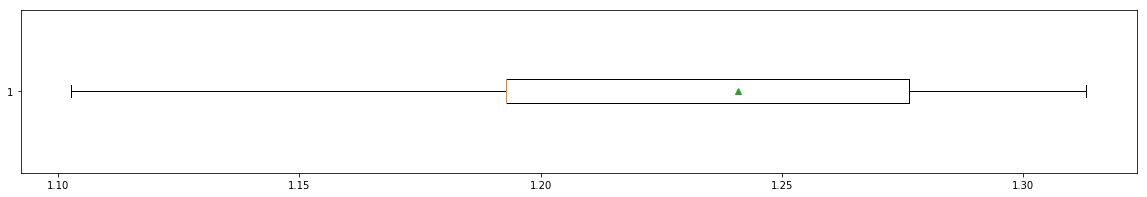

In [215]:
print('The mean ratio between average weekday passengers and Annual Passenger Count / 365 days is {} +/- {}'.format(
    round(df_Agg_clean['AvgWeekday/AvgRaw Passenger'].mean(), 2),
round(df_Agg_clean['AvgWeekday/AvgRaw Passenger'].std(), 3)))

plt.figure(figsize=(20,3))

plt.boxplot(x=df_Agg_clean['AvgWeekday/AvgRaw Passenger'], vert=False, showfliers=False, showmeans=True)

plt.show()

In [216]:
# 2. Finding Outlier Ratio Rows - Adding to dirty

df_Agg_dirty.append(df_Agg_clean[(df_Agg_clean['AvgWeekday/AvgRaw Passenger'] >= 1.49) | 
             (df_Agg_clean['AvgWeekday/AvgRaw Passenger'] <= 1.1)], sort=False)

,Vehicle_Type,Route,Average_Trip_Length,Operating_Ratio,Annual_Passengers,Average_Weekday_Passengers,Passenger_Miles,Passenger_Revenue,AvgPayment_Per_Passenger,Avg_Annual_Passengers,Avg.Payment_Per_Annual_Passenger,Raw_Per_Day_Passenger_Count,AvgWeekday/AvgRaw Passenger
86,Bus,91,13.10,12.00,4400.00,nan,57600.00,6693.00,1.52,nan,nan,nan,nan
95,Bus,124,19.10,19.00,436360.00,1.49,8334500.00,756661.00,1.73,77.27,9792.18,nan,nan
104,Bus,150,7.00,8.00,11.89,42.00,83200.00,35670.00,3000.00,2184.00,16.33,nan,nan
106,Bus,206,3.40,10.00,32.64,128.00,111.00,50248.00,1539.46,6656.00,7.55,nan,nan
154,Trolley,102,3.50,34.00,966.07,4095.00,3381200.00,1203337.00,1245.60,212940.00,5.65,nan,nan
38,Bus,45,1.80,18.00,782418.00,4299.00,1408400.00,844800.00,1.08,223548.00,3.78,2143.61,2.01
153,Trolley,101,4.10,20.00,999060.00,4235.00,4096100.00,1248720.00,1.25,220220.00,5.67,2737.15,1.55


In [217]:
# 3. Final clean
df_Agg_clean = df_Agg_clean[(df_Agg_clean['AvgWeekday/AvgRaw Passenger'] <= 1.49) | 
             (df_Agg_clean['AvgWeekday/AvgRaw Passenger'] >= 1.1)].copy()

In [218]:
# simplifying analysis to only certain numeric values

df_Aggfinal = df_Agg_clean[['Annual_Passengers', 'Average_Weekday_Passengers', 'Passenger_Revenue',
                           'Raw_Per_Day_Passenger_Count', 'AvgWeekday/AvgRaw Passenger']].copy()

In [219]:
# cleaning dirty, so that we can add it back to clean

# using our ratio of 1.24 for cleaning

df_Agg_dirty['AvgWeekday/AvgRaw Passenger'] = 1.24

## filling avg.weekday passenger nan

df_Agg_dirty.fillna({'Average_Weekday_Passengers':round(4400/365*1.24, 0)}, inplace=True)



In [240]:
df_Agg_dirty1 = df_Agg_dirty.copy()

In [224]:
df_Agg_dirty1.head()

,Vehicle_Type,Route,Average_Trip_Length,Operating_Ratio,Annual_Passengers,Average_Weekday_Passengers,Passenger_Miles,Passenger_Revenue,AvgPayment_Per_Passenger,Avg_Annual_Passengers,Avg.Payment_Per_Annual_Passenger,AvgWeekday/AvgRaw Passenger
86,Bus,91,13.10,12.00,4400.00,15.00,57600.00,6693.00,1.52,nan,nan,1.24
95,Bus,124,19.10,19.00,436360.00,1.49,8334500.00,756661.00,1.73,77.27,9792.18,1.24
104,Bus,150,7.00,8.00,11.89,42.00,83200.00,35670.00,3000.00,2184.00,16.33,1.24
106,Bus,206,3.40,10.00,32.64,128.00,111.00,50248.00,1539.46,6656.00,7.55,1.24
154,Trolley,102,3.50,34.00,966.07,4095.00,3381200.00,1203337.00,1245.60,212940.00,5.65,1.24


In [241]:
## cleaning other incorrect values manually
df_Agg_dirty1['Annual_Passengers'] = [round(i * 365 / 1.24, 0) if (i > 5) else j for i,j in
                                      zip(df_Agg_dirty1['Average_Weekday_Passengers'], 
                                          df_Agg_dirty1['Annual_Passengers'])]
df_Agg_dirty1

,Vehicle_Type,Route,Average_Trip_Length,Operating_Ratio,Annual_Passengers,Average_Weekday_Passengers,Passenger_Miles,Passenger_Revenue,AvgPayment_Per_Passenger,Avg_Annual_Passengers,Avg.Payment_Per_Annual_Passenger,AvgWeekday/AvgRaw Passenger
86,Bus,91,13.10,12.00,4415.00,15.00,57600.00,6693.00,1.52,nan,nan,1.24
95,Bus,124,19.10,19.00,436360.00,1.49,8334500.00,756661.00,1.73,77.27,9792.18,1.24
104,Bus,150,7.00,8.00,12363.00,42.00,83200.00,35670.00,3000.00,2184.00,16.33,1.24
106,Bus,206,3.40,10.00,37677.00,128.00,111.00,50248.00,1539.46,6656.00,7.55,1.24
154,Trolley,102,3.50,34.00,1205383.00,4095.00,3381200.00,1203337.00,1245.60,212940.00,5.65,1.24


In [242]:
df_Agg_dirty1['Average_Weekday_Passengers'] = [round(j / 365 * 1.24, 0) if j == 436360 else i for i,j in
                                      zip(df_Agg_dirty1['Average_Weekday_Passengers'], 
                                          df_Agg_dirty1['Annual_Passengers'])]
df_Agg_dirty1

,Vehicle_Type,Route,Average_Trip_Length,Operating_Ratio,Annual_Passengers,Average_Weekday_Passengers,Passenger_Miles,Passenger_Revenue,AvgPayment_Per_Passenger,Avg_Annual_Passengers,Avg.Payment_Per_Annual_Passenger,AvgWeekday/AvgRaw Passenger
86,Bus,91,13.10,12.00,4415.00,15.00,57600.00,6693.00,1.52,nan,nan,1.24
95,Bus,124,19.10,19.00,436360.00,1482.00,8334500.00,756661.00,1.73,77.27,9792.18,1.24
104,Bus,150,7.00,8.00,12363.00,42.00,83200.00,35670.00,3000.00,2184.00,16.33,1.24
106,Bus,206,3.40,10.00,37677.00,128.00,111.00,50248.00,1539.46,6656.00,7.55,1.24
154,Trolley,102,3.50,34.00,1205383.00,4095.00,3381200.00,1203337.00,1245.60,212940.00,5.65,1.24


In [250]:
df_Agg_final = pd.concat([df_Agg_dirty1, df_Agg_clean], ignore_index=True, sort=False)

In [251]:
# preparing final dataset
df_Agg = df_Agg_final[['Annual_Passengers', 'Raw_Per_Day_Passenger_Count', 'Average_Weekday_Passengers', 
                             'AvgWeekday/AvgRaw Passenger', 'Passenger_Revenue']].copy()

In [252]:
df_Agg['Raw_Per_Day_Passenger_Count'] = round(df_Agg['Annual_Passengers'] / 365, 0)


In [253]:
df_Agg.columns = ['Annual Passengers', 'Annual / 365', 'Average Weekday Passengers', 
                             'AvgWeekday/AvgRaw Passenger Ratio', 'Passenger Revenue']

In [254]:
df_Agg.head()

,Annual Passengers,Annual / 365,Average Weekday Passengers,AvgWeekday/AvgRaw Passenger Ratio,Passenger Revenue
0,4415.00,12.00,15.00,1.24,6693.00
1,436360.00,1196.00,1482.00,1.24,756661.00
2,12363.00,34.00,42.00,1.24,35670.00
3,37677.00,103.00,128.00,1.24,50248.00
4,1205383.00,3302.00,4095.00,1.24,1203337.00


***
***

### Finding the Connection between Revenue and Ridership

Outlier datapoints aside (all of which have fractions of passenger counts, like row 104 of "11.89 Annual Passengers" -  something clearly wrong, especially in light of aveage weekday passengers being 42...), There is more consistency of revenue per passenger payments in the Average Payment Per Raw Annual Passenger column than in the Average Payment Per Average Annual Passenger column. Of course, the values we see are not in between \\$2 and \\$2.50, so what gives?

In [259]:
# Finding an Average "Payment Per Passenger" and Weekday Passenger Ridership

df_Agg['Raw Passenger Fare'] = round(df_Agg['Passenger Revenue'] / df_Agg['Annual Passengers'], 2)

df_Agg['Weekday Psgr Fare'] = round((df_Agg['Passenger Revenue'] * (5/7) / 
                                  (df_Agg['Average Weekday Passengers'] * 365 * (5/7))), 2)

df_Agg.head()                                     
                

,Annual Passengers,Annual / 365,Average Weekday Passengers,AvgWeekday/AvgRaw Passenger Ratio,Passenger Revenue,Raw Passenger Revenue,Weekday Psgr Revenue,Raw Passenger Fare,Weekday Psgr Fare
0,4415.00,12.00,15.00,1.24,6693.00,1.52,1.22,1.52,1.22
1,436360.00,1196.00,1482.00,1.24,756661.00,1.73,1.40,1.73,1.40
2,12363.00,34.00,42.00,1.24,35670.00,2.89,2.33,2.89,2.33
3,37677.00,103.00,128.00,1.24,50248.00,1.33,1.08,1.33,1.08
4,1205383.00,3302.00,4095.00,1.24,1203337.00,1.00,0.81,1.00,0.81


In [277]:
print('Below are the following ranges of average prices per total passenger for Fiscal Year 2017 (outliers included):\n\n',
      df_Agg['Raw Passenger Fare'].value_counts(normalize=True, bins=4))

print('For Fiscal Year 2017, the mean fare for passengers is ${} +/- ${} total and ${} +/- ${} on weekdays'.format(
    round(df_Agg['Raw Passenger Fare'].mean(), 2), 
    round(df_Agg['Raw Passenger Fare'].std(), 2),
    round(df_Agg['Weekday Psgr Fare'].mean(), 2),
    round(df_Agg['Weekday Psgr Fare'].std(), 2)
))

Below are the following ranges of average prices per total passenger for Fiscal Year 2017 (outliers included):

 (0.125, 1.223]   0.65
(1.223, 2.315]   0.34
(3.407, 4.5]     0.01
(2.315, 3.407]   0.01
Name: Raw Passenger Fare, dtype: float64
For Fiscal Year 2017, the mean fare for passengers is $1.22 +/- $0.4 total and $0.99 +/- $0.28 on weekdays


In [284]:
# checking this again without outliers

df_Agg_nooutliers = df_Agg[df_Agg['Raw Passenger Fare'].between(0.75, 2)]

In [286]:
print('Below are the following ranges of average prices per total passenger for Fiscal Year 2017 (outliers EXCLUDED):\n\n',
      df_Agg_nooutliers['Raw Passenger Fare'].value_counts(normalize=True, bins=2))

print('For Fiscal Year 2017, the mean fare for passengers is ${} +/- ${} total and ${} +/- ${} on weekdays'.format(
    round(df_Agg_nooutliers['Raw Passenger Fare'].mean(), 2), 
    round(df_Agg_nooutliers['Raw Passenger Fare'].std(), 2),
    round(df_Agg_nooutliers['Weekday Psgr Fare'].mean(), 2),
    round(df_Agg_nooutliers['Weekday Psgr Fare'].std(), 2)
))

Below are the following ranges of average prices per total passenger for Fiscal Year 2017 (outliers EXCLUDED):

 (0.998, 1.46]   0.80
(1.46, 1.92]    0.20
Name: Raw Passenger Fare, dtype: float64
For Fiscal Year 2017, the mean fare for passengers is $1.2 +/- $0.2 total and $0.98 +/- $0.14 on weekdays


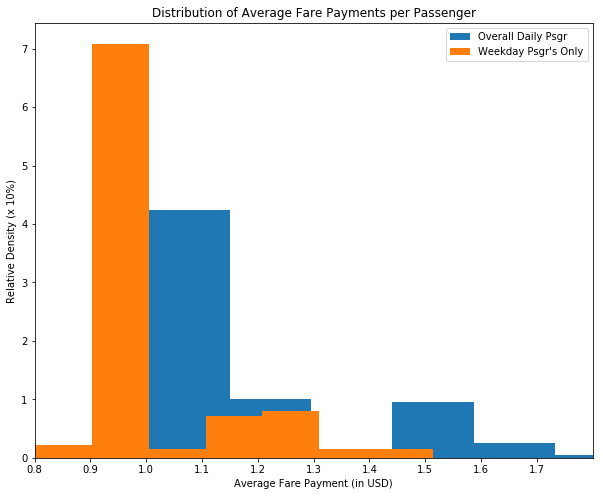

In [270]:
# Creating histogram for range of $0.80 to $1.80

plt.figure(figsize=(10,8))

plt.hist(df_Agg['Raw Passenger Fare'], density=True, bins=30)
plt.hist(df_Agg['Weekday Psgr Fare'], density=True, bins=20)
plt.title('Distribution of Average Fare Payments per Passenger')

plt.legend(['Overall Daily Psgr', 'Weekday Psgr\'s Only'])

plt.xlim(0.8, 1.8)
plt.xticks(np.arange(0.8, 1.8, 0.1).tolist())
#plt.yticks(np.arange(0, 8, 1).tolist())
plt.xlabel('Average Fare Payment (in USD)')
plt.ylabel('Relative Density (x 10%)')

plt.show()

### What does this Mean?

This means three things:

#### First and foremost...

There is no significant difference between the amount that a passenger pays on the weekdays and the amount a passenger pays on the weekends, which is a good premise to establish.

#### Second (and arguably more foremost)...

__REVENUE IS NOT A GOOD INDICATOR OF KEY TAPS OR OF RIDERSHIP!!!!!__


> __Question:__ Why is this?
>
> __Answer:__ To suggest that revenue is a good indicator of ridership would imply that people pay for single trips all the time. This is not true. Even though we excluded regional rail riders, individuals can still make purchases of week-long or month-long transportation passes. Additionally, SEPTA key cards cost \\$4.95. They must be purchased either at the beginning or if they get lost.
>
>
>These considerations would explain the gross under-reporting of revenue; if people did do single trip rides all the time, the average payment per person riding would indeed be \\$2 to \\$2.50.



The prices found in the histogram of about \\$1.20 do not reflect the actual price of SEPTA fare! Actual SEPTA fare is \\$2.00 for SEPTA key card usage and \\$2.50 for non-SEPTA key card payments (i.e., 1.25x the price of SEPTA key card price).


#### Third: Does revenue still tell us something helpful?

__Yes.__


Given this information, riders would fall into two main camps: those who use multi-day passes and those who don't. Multi-day pass riders would have wonky average payments because of the combination of buying the passes (or not) and some day payments. This leads to a much larger distribution of individual payment values.


For those who don't, there should be two large peaks - those who pay by key tap and those who pay buy cash. If we can isolate those two large peaks, we can find the ___ratio___ between those who pay by key tap and those who don't, which is critical for this analysis. Indeed, we see this:


 - For the Total Passenger Distribution (blue), there are high peaks at __~1.15 and ~1.45__, which is about a 25\% difference between the two.
 - For the Weekday Passenger Distribution (orange), there are high peaks at __~0.95 and ~1.2__, which is about a 25\% difference between the two.
 

The no_outliers dataset gives us that clear __80/20__ picture when only using two bins (the outliers included dataset had less reliable peaks). This ratio is what we need to determine ridership.
***

### What we will do Next

1. Use ___ridership data___ to find average numbers of riders for years 2017, 2018, and 2019, found on the [SEPTA November 2019 Annual Report](https://septa.org/strategic-plan/reports/revenue-ride.pdf).


2. Apply inflation of weekday ridership of df_final to our values (because aggregated reports do not have weekday/weekend distinction).


3. Apply any incidental ridership due to seasonal ridership changes.


4. Take the 80\% portion that use key taps, as described above (because aggregated reports do not have key tap/non-key tap distinction - only raw revenue).


6. Make our conclusion.

### 1. Average Number of Riders

The average number of daily riders is stated to be __698,000__, with 17\% (119,000) of them being regional rail riders. SEPTA November 2019 Annual Report (p. 2). Subtracting that number, the average number of non-regional rail riders is __579,000__.


We will be applying the 83\% proportion to all ridership values.

In [429]:
regionalrailexclusionadj = 1-(119000/698000)

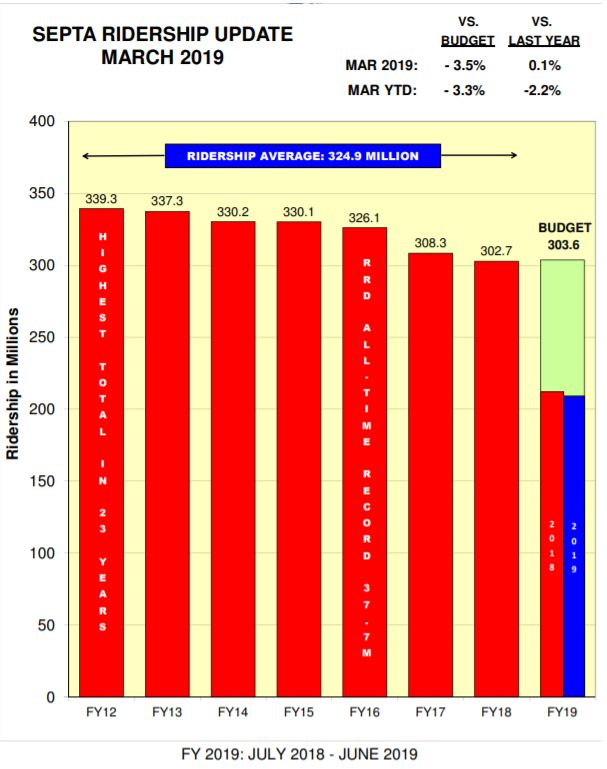

In [350]:
from IPython.display import Image
Image(data="ridershipagg.jpg", width=450)

We see that there is a __downward trend year-to-year__ for public transportation use, as measured by passenger revenue. This has been observed by SEPTA, especially in the bus sector, as described in both [2018](https://www.inquirer.com/transportation/census-transit-community-philadelphia-bike-train-subway-bus-20181209.html) and [2019](https://www.inquirer.com/transportation/septa-bus-ridership-transit-loss-20190326.html) Philadelphia Inquirer articles. We can speculate the reasons - perhaps this is due in part to the rising popularity of ride-sharing services like Uber and Lyft (although some say that this transportation bubble is [ready to pop (if it hasn't already!)](https://www.inquirer.com/news/uber-lyft-rideshare-drivers-philadelphia-pay-cut-ipo-public-stock-strike-20190410.html).


This is merely an observation to be considered.
***

### Other Data Obtained

Additional information from the 2019 Report is that there is a breakdown in revenue between the first six months, the next five months, and the month of November 2019 individually. Unfortunately, we don't have any data for December specifically, but November is close enough, both temporally and holiday-wise. Also, I recognize that these years are "fiscal years", but that shouldn't matter for purposes of our analysis.

***

In [430]:
# daily ridership values assignments - all taken from the graph

## 2017 - using this instead of the wonky ones found in df_Agg
dailyridership2017 = round(308300000 * regionalrailexclusionadj / 365, 0)

## 2018
dailyridership2018 = round(302700000 * regionalrailexclusionadj / 365, 0)

## 2019 - yes, I am using SEPTA's projection
dailyridership2019 = round(303600000 * regionalrailexclusionadj / 365, 0)

dailyridershiptotal = [dailyridership2017, dailyridership2018, dailyridership2019]

***
### 2. Finding Inflation of Weekday Ridership According to df_Agg

In [318]:
'''
For reasons described above,
we will use df_Agg and ***NOT*** df_Agg_nooutliers
because the outlier analysis was to determine whether
in calculating 
'''

df_final = df_Agg.copy()

In [431]:
# determining average weekday passengers based on this

avgweekdaykeytap = round(df_final['Average Weekday Passengers'].sum(), 0)

print('The average number of riders on any given weekday according to df_Agg is {}.'.format(avgweekdaykeytap))

The average number of riders on any given weekday according to df_Agg is 922762.0.


In [432]:
print('The average number of riders on any given DAY according to df_Agg is {}.'.format(df_final['Annual / 365'].sum()))

# This is more than 2019 SEPTA Annual Report's average ridership of 579,000, excluding regional rail riders...

The average number of riders on any given DAY according to df_Agg is 764888.0.


In [433]:
weekdayinflation = round(922762/764888, 2)

print('On average, there is a {}% increase in ridership on weekdays when compared to weekend ridership.'
      .format(round((weekdayinflation-1)*100, 4)))

On average, there is a 21.0% increase in ridership on weekdays when compared to weekend ridership.


__Note:__ I recognize this is a misleading value since Annual / 365 includes the weekday ridership, but this is what we are working with - there is no average weekend ridership...
***
### 3. Checking for Temporal Inflation/Deflation with November vs. Rest of Year

Revenue values taken from different reports: 
 
 
 - For entire fiscal years 2017, 2018, 2019 taken from: [SEPTA Audit Report](http://septa.org/strategic-plan/reports/2019-audited-financials.pdf), p. 8.
 
 
 - Reported revenues of the months 7/1 to 11/30 _and_ the month of November individually taken from [SEPTA November 2019 "Selected Financial and Operating Performance Results" Report](http://septa.org/strategic-plan/reports/board.pdf), p. 4.
 
***
__Note:__ See Conclusion, _infra_, for reflection on incorporation of a temporal inflation/deflation (long story short - it's inapposite).

In [352]:
# revenues for first six months for 2017, 2018, and 2019

passengerrevenues = [442707*1000, 467901*1000, 459075*1000] 

#########

# representing July to November 2018 and 2019

fivemonth_pass_revenues = [192278*1000, 193273*1000]

########

#representing November 2018 and 2019 one-month revenues

november_pass_revenues = [44139*1000, 45133*1000]

In [354]:
firstsix_monthlyrevenue = [i / 12 for i in passengerrevenues]
nextfive_monthlyrevenue = [i / 5 for i in fivemonth_pass_revenues]

print(firstsix_monthlyrevenue)
print(nextfive_monthlyrevenue)

[36892250.0, 38991750.0, 38256250.0]
[38455600.0, 38654600.0]


__Observation:__ 

There appears to be a large difference in monthly passenger revenue between the month of November and the remaining months:
 - ___For 2018:___
     - 5-month revenue / 5: \\$38,455,600
     - November revenue:    \\$44,139,000
     
     
 - ___For 2019:___
     - 5-month revenue / 5: \\$38,654,600
     - November revenue:    \\$45,133,000
     
__Why is this important again?__

This is important to note, because as a premise, the month of November is ___more representative___ of the month of December - the one that we are analyzing - than many other months. For this reason, we will use revenues to determine the degree of inflation, and apply that degree to our ridership.

In [361]:
# determining what proportion November ranges are inflated...
holidayinflation_scaler = round(np.mean([44139000/38455600, 45133000/38654600]), 2)
holidayinflation_scalerstd = round(np.std([44139000/38455600, 45133000/38654600]), 2)

print('November revenue is inflated by {}% +/- {}% when compared to average monthly revenue for years 2018 and 2019.'
     .format(round((holidayinflation_scaler-1)*100, 1), holidayinflation_scalerstd))

November revenue is inflated by 16.0% +/- 0.01% when compared to average monthly revenue for years 2018 and 2019.


***
### 4. Final Ridership Counts and Application to Key Taps

In [434]:
# revising via accounting for weekday inflation and holiday inflation
dailyriderrevised2017 = round(dailyridership2017 * holidayinflation_scaler * weekdayinflation, 0)

dailyriderrevised2018 = round(dailyridership2018 * holidayinflation_scaler * weekdayinflation, 0)

dailyriderrevised2019 = round(dailyridership2019 * holidayinflation_scaler * weekdayinflation, 0)

In [435]:
df_conclusion = pd.DataFrame({'Holiday Period Daily Ridership' : 
                              [dailyriderrevised2017, dailyriderrevised2018, dailyriderrevised2019]})

In [436]:
df_conclusion.index = ['2017', '2018', '2019']

In [437]:
df_conclusion['Estimated Key Taps From Ridership'] = round(df_conclusion['Holiday Period Daily Ridership'] * 0.8, 0)
print('Estimated Key Taps is equal to 80% of Holiday Daily Ridership Count.')
df_conclusion

Estimated Key Taps is equal to 80% of Holiday Daily Ridership Count.


,Holiday Period Daily Ridership,Estimated Key Taps From Ridership
2017,983438.00,786750.00
2018,965576.00,772461.00
2019,968446.00,774757.00


***
# 5. Conclusion

Based on these values, we estimate that __774,757 SEPTA key taps__ on Friday, December 20, 2019. Seems like a lot, especially given 2019

***
__Update:__ After the competition concluded, I reached out to iSeptaPhilly.com to inquire the results:


1. _What was the actual count for that day?_ __553,132__
2. _What was the closest guess, including those guesses that went over?_ __553,912__
3. _What was the closest guess without going over (i.e., the winning guess)?_ __551,476__ 
    1. Winning guess was made by  "Gary R." - not a data analyst as far as I can see on LinkedIn...

***
My estimation of 774,757 was not only over, but it was way over: specifically, it was off by ___40.07\%___...big oof. Upon reflection, the things that caused me to grossly overestimate are::


- I did not err on a lower estimation to play it safe. I just received a number and regurgitated it as my answer. I should've applied an 80 to 85\% buffer for safety purposes.


- The proportion of people using SEPTA key taps. Looking at the distribution of payments _with_ outliers, the split was closer to 65/35 than 80/20. However, the outliers were pretty extreme, and so I would stick with an 80/20 split.


- Because there was no way to proportion this with the data available, there was no accounting for the actual number of regional rail rider key taps, since people _are_ using SEPTA keys on regional rails. A complete exclusion was inappropriate - and therefore - a complete exclusion would constitute our "buffer" in bullet 1 _supra_.


- I should not have included holiday inflation - my b - sorry for wasting your time on that part! Holiday inflation or deflation would account for revenue for a whole month, but it would have no effect on any individual day that is not a holiday! December 20th is not a holiday and thus should've been treated as a regular weekday.


- Taking SEPTA's ridership estimation for fiscal year 2019 was a mistake. As stated above, there is a downward trend in ridership every single year since FY 2012. Why FY 2019 was expected to be higher than FY 2018 is unsubstantiated.

***

If we were to do the above adjustments, this is what we would get:

In [439]:
# finding a good regression estimate for FY 2019
from sklearn.linear_model import LinearRegression

X = list(range(1, 8)) # x values don't matter - just the relative horizontal difference between the points
y = [339.3, 337.3, 330.2, 330.1, 326.1, 308.3, 302.7]
y = [i * regionalrailexclusionadj for i in y]

In [445]:
X = np.array(X).reshape(-1,1) # sklearn takes 2D numpy array format

fy2019adj = 303.6 * regionalrailexclusionadj

regr = LinearRegression().fit(X,y)
pred = regr.predict([[8]])
print('''
SEPTA estimated {} million riders for Fiscal Year 2019, while the linear regression model predicts {} million riders!
'''
     .format(round(fy2019adj, 3), round(pred[0], 3)))


SEPTA estimated 251.84 million riders for Fiscal Year 2019, while the linear regression model predicts 249.103 million riders!



In [451]:
'''
We will now make a prediction of number of SEPTA key taps 
using the following parameters:
- ridership = pred / 365
- No holiday inflation
- key taps = ridership * 80% (this includes buffer)
'''

ridershipREVISED = pred[0] / 365 * 1000000
Key_Taps = round(ridershipREVISED * 0.8, 0)

print('The revised number of estimated SEPTA key taps for December 20, 2019 is ****{}**** taps.'.format(Key_Taps))

The revised number of estimated SEPTA key taps for December 20, 2019 is ****545979.0**** taps.


In [460]:
ad = 249103000/365

551476/545979 - 1

0.010068152804411978

# 6. Revised Conclusion

By using a (1) revised raw annual ridership count divided by 365, (2) not doing any holiday inflation, and (3) using the lower estimated proportion of 65\% of riders use a key tap, __we dropped our error rate from 40.07\% all the way to 1.31\%!__ 


Unfortunately, with an actual count of 553,132, our corrected estimation of 545,979 still wouldn't have won the competition - the winning guess was 551,476. And in case you're curious, the percentage of daily ridership (as defined by 249.103 million people / 365 days) that used key taps was 81.05\%. Maybe the extra 1 to 2\% are people who use SEPTA key cards on regional rails (that is total speculation - I'm just spitballing here).

***
Still, the power of data analysis even with very limited open data gets us damn close!!!! Out of a city with ~1.6 million people and a metropolitan area of over 6 million people, we landed a (revised...) guess within 1.01% of the winning guess and 1.31\% of the actual answer! There is little to no doubt that better open data would've given us a pinpoint estimate!


I hope you all enjoyed this analysis. Feel free to email me at jafonte01@gmail.com if you have any questions or comments.


#### John A. Fonte